In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_user_attributes = _hex_json.loads("{}")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"019be3b2-26d6-7009-a518-27205e9449e9\"")

In [ ]:
hex_project_name = _hex_json.loads("\"jobshock_navigator\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:
!pip install pytrends

Try `uv pip` instead for faster package installs:
!uv pip install pytrends
Learn more: https://learn.hex.tech/docs/explore-data/projects/environment-configuration/using-packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 95.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [ ]:
import requests
import pandas as pd

In [ ]:
import requests
import pandas as pd

API_KEY = "261e913651d9b2409d735eba1cabd92f"
series_ids = ["ICSA", "UNRATE", "PAYEMS"]

dfs = {}
for sid in series_ids:
    r = requests.get(
        f"https://api.stlouisfed.org/fred/series/observations",
        params={"series_id": sid, "api_key": API_KEY, "file_type": "json"}
    )
    r.raise_for_status()
    data = r.json()["observations"]
    dfs[sid] = pd.DataFrame(data)

dfs["UNRATE"].head()


,realtime_start,realtime_end,date,value
0,2026-01-09,2026-01-09,1948-01-01,3.4
1,2026-01-09,2026-01-09,1948-02-01,3.8
2,2026-01-09,2026-01-09,1948-03-01,4.0
3,2026-01-09,2026-01-09,1948-04-01,3.9
4,2026-01-09,2026-01-09,1948-05-01,3.5


In [ ]:
from pytrends.request import TrendReq
import pandas as pd

pytrends = TrendReq(hl="en-US", tz=360)

kw_list = ["laid off", "unemployment benefits", "jobs near me"]
pytrends.build_payload(kw_list, timeframe="today 12-m", geo="US")

df_trends = pytrends.interest_over_time()
df_trends.head()

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.11/lib/python3.11/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


,laid off,unemployment benefits,jobs near me,isPartial
date,,,,
2025-01-19,3,5,92,False
2025-01-26,3,6,98,False
2025-02-02,4,6,95,False
2025-02-09,5,5,87,False
2025-02-16,8,6,92,False


In [ ]:
if "isPartial" in df_trends.columns:
    df_trends = df_trends.drop(columns=["isPartial"])
df_trends.tail()

,laid off,unemployment benefits,jobs near me
date,,,
2025-12-21,2,6,59
2025-12-28,2,7,81
2026-01-04,3,7,99
2026-01-11,3,6,89
2026-01-18,2,7,95


In [ ]:
df_risk_sig = df_trends.copy()

for col in df_risk_sig.columns:
    df_risk_sig[col + "_delta"] = df_risk_sig[col].diff()

df_risk_sig.tail()

,laid off,unemployment benefits,jobs near me,laid off_delta,unemployment benefits_delta,jobs near me_delta
date,,,,,,
2025-12-21,2,6,59,0.0,0.0,-16.0
2025-12-28,2,7,81,0.0,1.0,22.0
2026-01-04,3,7,99,1.0,0.0,18.0
2026-01-11,3,6,89,0.0,-1.0,-10.0
2026-01-18,2,7,95,-1.0,1.0,6.0


In [ ]:
df_score = pd.DataFrame(index=df_risk_sig.index)

df_score["ShockScore"] = (
    0.5 * df_risk_sig["laid off_delta"].fillna(0) +
    0.3 * df_risk_sig["unemployment benefits_delta"].fillna(0) +
    0.2 * df_risk_sig["jobs near me_delta"].fillna(0)
)

df_score.tail()

,ShockScore
date,
2025-12-21,-3.2
2025-12-28,4.7
2026-01-04,4.1
2026-01-11,-2.3
2026-01-18,1.0


In [ ]:
df_score2 = df_score.copy()
df_score2["ShockScore_ma3"] = df_score2["ShockScore"].rolling(3).mean()

baseline = df_score2["ShockScore_ma3"].tail(12).mean()
std = df_score2["ShockScore_ma3"].tail(12).std()

TH_HIGH = baseline + 0.8 * std
TH_LOW  = baseline - 0.8 * std

baseline, std, TH_HIGH, TH_LOW

(np.float64(0.2555555555555555),
 np.float64(1.1793966385302408),
 np.float64(1.199072866379748),
 np.float64(-0.6879617552686372))

In [ ]:
def classify(score):
    if pd.isna(score):
        return "UNKNOWN"
    if score >= TH_HIGH:
        return "ALERT"
    if score <= TH_LOW:
        return "CALM"
    return "WATCH"

df_score2["state"] = df_score2["ShockScore_ma3"].apply(classify)
df_score2.tail(8)


,ShockScore,ShockScore_ma3,state
date,,,
2025-11-30,4.7,0.500000,WATCH
2025-12-07,-0.7,0.066667,WATCH
2025-12-14,-0.9,1.033333,WATCH
2025-12-21,-3.2,-1.600000,CALM
2025-12-28,4.7,0.200000,WATCH
2026-01-04,4.1,1.866667,ALERT
2026-01-11,-2.3,2.166667,ALERT
2026-01-18,1.0,0.933333,WATCH


In [ ]:
RECOMMENDATIONS = {
    "ALERT": [
        {"role": "Warehouse / Logistics", "why": "Downturn-resilient demand"},
        {"role": "Healthcare Admin", "why": "Essential services stay stable"},
        {"role": "Customer Support (Remote)", "why": "Low barrier, flexible demand"},
        {"role": "Maintenance / Repair", "why": "Always-needed local services"},
    ],
    "WATCH": [
        {"role": "Customer Support", "why": "Stable across industries"},
        {"role": "Sales Ops / Back Office", "why": "Transferable skills"},
        {"role": "Delivery / Driver", "why": "Steady demand"},
    ],
    "CALM": [
        {"role": "Your current industry roles", "why": "No immediate shock signal"},
        {"role": "Growth roles (Data/Cloud)", "why": "Upskilling window"},
    ],
    "UNKNOWN": [
        {"role": "General roles", "why": "Not enough data yet"},
    ]
}

latest = df_score2.tail(1).iloc[0]
latest_state = latest["state"]
latest_state, latest["ShockScore"], latest["ShockScore_ma3"]


('WATCH', np.float64(1.0000000000000002), np.float64(0.9333333333333332))

In [ ]:
today_recos = RECOMMENDATIONS[latest_state]
today_recos

[{'role': 'Customer Support', 'why': 'Stable across industries'},
 {'role': 'Sales Ops / Back Office', 'why': 'Transferable skills'},
 {'role': 'Delivery / Driver', 'why': 'Steady demand'}]

##  JobShock Navigator



### Current Status: **{{latest_state}}**

- ShockScore (raw): {{latest["ShockScore"]}}

- ShockScore (MA3): {{latest["ShockScore_ma3"]}}



### Recommended Escape Routes

{% for r in today_recos %}

- **{{r["role"]}}** — {{r["why"]}}

{% endfor %}



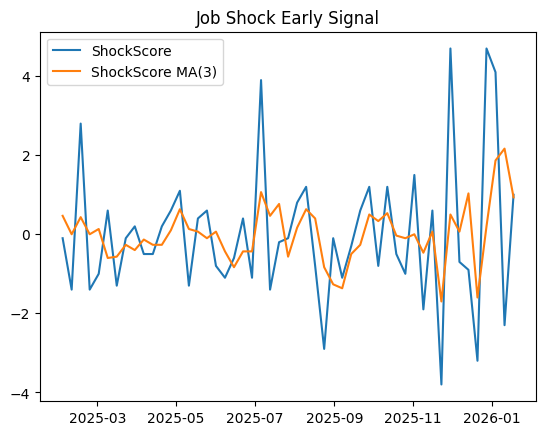

In [ ]:
import matplotlib.pyplot as plt

tmp = df_score2.dropna()

plt.figure()
plt.plot(tmp.index, tmp["ShockScore"], label="ShockScore")
plt.plot(tmp.index, tmp["ShockScore_ma3"], label="ShockScore MA(3)")
plt.legend()
plt.title("Job Shock Early Signal")
plt.show()

In [ ]:
import pandas as pd

df_trends = df_trends.reset_index()

if "isPartial" in df_trends.columns:
    df_trends = df_trends.drop(columns=["isPartial"])

df_trends = df_trends.rename(columns={
    "laid off": "laid_off",
    "unemployment benefits": "unemployment_benefits",
    "jobs near me": "jobs_near_me",
})

df_trends.head()

,date,laid_off,unemployment_benefits,jobs_near_me
0,2025-01-19,3,5,92
1,2025-01-26,3,6,98
2,2025-02-02,4,6,95
3,2025-02-09,5,5,87
4,2025-02-16,8,6,92


In [ ]:
df_feat = df_trends.copy()
for col in ["laid_off", "unemployment_benefits", "jobs_near_me"]:
    df_feat[col + "_delta"] = df_feat[col].diff()

df_feat["ShockScore"] = (
    0.5 * df_feat["laid_off_delta"].fillna(0) +
    0.3 * df_feat["unemployment_benefits_delta"].fillna(0) +
    0.2 * df_feat["jobs_near_me_delta"].fillna(0)
)
df_feat["ShockScore_ma3"] = df_feat["ShockScore"].rolling(3).mean()

df_feat.tail()

,date,laid_off,unemployment_benefits,jobs_near_me,laid_off_delta,unemployment_benefits_delta,jobs_near_me_delta,ShockScore,ShockScore_ma3
48,2025-12-21,2,6,59,0.0,0.0,-16.0,-3.2,-1.600000
49,2025-12-28,2,7,81,0.0,1.0,22.0,4.7,0.200000
50,2026-01-04,3,7,99,1.0,0.0,18.0,4.1,1.866667
51,2026-01-11,3,6,89,0.0,-1.0,-10.0,-2.3,2.166667
52,2026-01-18,2,7,95,-1.0,1.0,6.0,1.0,0.933333


In [ ]:
import numpy as np

recent = df_feat["ShockScore_ma3"].dropna().tail(12)
baseline = recent.mean()
std = recent.std(ddof=0)

TH_HIGH = baseline + 0.8 * std
TH_LOW  = baseline - 0.8 * std

def classify(x):
    if pd.isna(x): return "UNKNOWN"
    if x >= TH_HIGH: return "ALERT"
    if x <= TH_LOW:  return "CALM"
    return "WATCH"

df_feat["state"] = df_feat["ShockScore_ma3"].apply(classify)

df_feat.tail(8)[["date","ShockScore","ShockScore_ma3","state"]]

,date,ShockScore,ShockScore_ma3,state
45,2025-11-30,4.7,0.500000,WATCH
46,2025-12-07,-0.7,0.066667,WATCH
47,2025-12-14,-0.9,1.033333,WATCH
48,2025-12-21,-3.2,-1.600000,CALM
49,2025-12-28,4.7,0.200000,WATCH
50,2026-01-04,4.1,1.866667,ALERT
51,2026-01-11,-2.3,2.166667,ALERT
52,2026-01-18,1.0,0.933333,WATCH


In [ ]:
import re

def normalize_job(job: str) -> str:
    return (job or "").strip().lower()

def classify_job_family(job: str) -> str:
    j = normalize_job(job)

    if re.search(r"(retail|store|sales|cashier|shop|customer)", j):
        return "retail"
    if re.search(r"(restaurant|food|kitchen|waiter|barista)", j):
        return "food"
    if re.search(r"(factory|manufacturing|production|operator)", j):
        return "manufacturing"
    if re.search(r"(office|admin|clerical|assistant|secretary)", j):
        return "office"
    if re.search(r"(driver|delivery|logistics|warehouse)", j):
        return "logistics"
    if re.search(r"(engineer|developer|software|it|cloud)", j):
        return "tech"
    if re.search(r"(nurse|care|health|clinic|medical)", j):
        return "health"
    return "general"

In [ ]:
ESCAPE_ROUTES = {
    "ALERT": {
        "retail": [
            ("Warehouse / Logistics", "Stable demand even in downturns"),
            ("Customer Support (Remote)", "Transferable communication skills"),
            ("Delivery / Driver", "Essential distribution roles"),
        ],
        "food": [
            ("Food Production / Packaging", "Demand stays relatively stable"),
            ("Delivery / Driver", "Same domain, more stable"),
            ("Customer Support", "Low barrier pivot"),
        ],
        "manufacturing": [
            ("Maintenance / Repair", "Always needed services"),
            ("Quality Assurance", "Adjacent skills, stable operations"),
            ("Warehouse / Logistics", "Operational pivot"),
        ],
        "office": [
            ("Healthcare Admin", "Essential sector stability"),
            ("Customer Support", "Transferable ops skills"),
            ("Payroll / HR Assistant", "Back-office stability"),
        ],
        "logistics": [
            ("Warehouse Supervisor", "Upshift within domain"),
            ("Maintenance / Repair", "Operational resilience"),
            ("Customer Support", "Fallback option"),
        ],
        "tech": [
            ("Cloud Support / SRE junior", "Infrastructure remains critical"),
            ("Security Analyst trainee", "Demand grows in uncertainty"),
            ("Customer Support (Tech)", "Lower barrier entry"),
        ],
        "health": [
            ("Medical Admin", "Stable demand"),
            ("Care Coordination", "High need services"),
            ("Clinic Support Staff", "Low retraining"),
        ],
        "general": [
            ("Customer Support", "Broadly resilient"),
            ("Logistics / Delivery", "Essential supply chain"),
            ("Maintenance / Repair", "Local essential services"),
        ],
    },
    "WATCH": {
        "general": [
            ("Customer Support", "Stable across industries"),
            ("Logistics / Delivery", "Steady demand"),
            ("Office Operations", "Transferable baseline"),
        ],
    },
    "CALM": {
        "general": [
            ("Stay in current path", "Signals are calm right now"),
            ("Upskill window", "Best time to invest in skills"),
        ],
    },
    "UNKNOWN": {
        "general": [
            ("General roles", "Not enough data yet"),
        ],
    }
}

def recommend(job_title: str, state: str):
    fam = classify_job_family(job_title)
    # state-specific mapping fallback to general
    state_map = ESCAPE_ROUTES.get(state, ESCAPE_ROUTES["UNKNOWN"])
    routes = state_map.get(fam) or state_map.get("general") or ESCAPE_ROUTES["UNKNOWN"]["general"]
    return fam, routes

In [ ]:
latest = df_feat.tail(1).iloc[0]
state = latest["state"]

job_input = "retail cashier"  # ← ここをユーザー入力にする
fam, routes = recommend(job_input, state)

state, fam, routes[:3]

('WATCH',
 'retail',
 [('Customer Support', 'Stable across industries'),
  ('Logistics / Delivery', 'Steady demand'),
  ('Office Operations', 'Transferable baseline')])